In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-fly.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

season = 14
df = df[df['season'] == season]
len(df)

17504

In [2]:
df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"),"pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"),"batter_vibes"] = 0

for attr in ['batter_buoyancy', 'batter_divinity', 'batter_martyrdom', 'batter_moxie', 'batter_musclitude', 'batter_patheticism', 'batter_thwackability', 'batter_tragicness', 'batter_coldness', 'batter_overpowerment', 'batter_ruthlessness', 'batter_shakespearianism', 'batter_suppression', 'batter_unthwackability', 'batter_base_thirst', 'batter_continuation', 'batter_ground_friction', 'batter_indulgence', 'batter_laserlikeness', 'batter_anticapitalism', 'batter_chasiness', 'batter_omniscience', 'batter_tenaciousness', 'batter_watchfulness', 'batter_pressurization', 'batter_cinnamon']:
    df[attr] = df[attr] * df['batter_multiplier']
    df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['batter_vibes'])
for attr in ['pitcher_buoyancy', 'pitcher_divinity', 'pitcher_martyrdom', 'pitcher_moxie', 'pitcher_musclitude', 'pitcher_patheticism', 'pitcher_thwackability', 'pitcher_tragicness', 'pitcher_ruthlessness', 'pitcher_overpowerment', 'pitcher_unthwackability', 'pitcher_shakespearianism', 'pitcher_suppression', 'pitcher_coldness', 'pitcher_base_thirst', 'pitcher_continuation', 'pitcher_ground_friction', 'pitcher_indulgence', 'pitcher_laserlikeness', 'pitcher_anticapitalism', 'pitcher_chasiness', 'pitcher_omniscience', 'pitcher_tenaciousness', 'pitcher_watchfulness', 'pitcher_pressurization', 'pitcher_cinnamon']:
    df[attr] = df[attr] * df['pitcher_multiplier']
    df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['pitcher_vibes'])

for attr in ['defense_avg_anticapitalism', 'defense_avg_chasiness', 'defense_avg_omniscience', 'defense_avg_tenaciousness', 'defense_avg_watchfulness']:
    df[attr + '_times_vibe'] = df[attr] * df['defender_vibes']
    df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['defender_vibes'])


/var/folders/g5/scl2096539l75kwsbhhq4pth0000gn/T/ipykernel_73250/3042228743.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['pitcher_vibes'])
/var/folders/g5/scl2096539l75kwsbhhq4pth0000gn/T/ipykernel_73250/3042228743.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['pitcher_vibes'])
/var/folders/g5/scl2096539l75kwsbhhq4pth0000gn/T/ipykernel_73250/3042228743.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is u

In [3]:
dfc = df.copy()
# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING"]:
 dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]

# dfc = dfc[dfc['roll'] < 0.7]
# dfc = dfc[dfc['roll'] > 0.2]
dfc = dfc[(dfc['pitcher_multiplier'] == 1) & (dfc['batter_multiplier'] == 1)]
# dfc = dfc[(dfc['pitcher_vibes'].abs() < 0.2) & (dfc['batter_vibes'].abs() < 0.2)]
# for limit_attr in ['batter_patheticism', 'batter_thwackability', 'batter_divinity', 'batter_musclitude', 'pitcher_ruthlessness']:
#     dfc = dfc[(dfc[limit_attr] > 0.1) & (dfc[limit_attr] < 0.9)]
# dfc = dfc[dfc['batter_thwackability'] + dfc['batter_musclitude'] + dfc['batter_divinity'] > dfc['batter_patheticism']]

len(dfc)

11275

In [4]:
# dfc.corr()['offset'].sort_values()

In [5]:
X = dfc[['roll', 'passed',
         'batter_buoyancy_with_vibe',
         # 'batter_martyrdom_with_vibe',
 # 'defense_avg_anticapitalism_with_vibe',
 # 'defense_avg_chasiness_with_vibe',
 # 'defense_avg_omniscience_with_vibe',
 # 'defense_avg_tenaciousness_with_vibe',
 # 'defense_avg_watchfulness_with_vibe',
 # 'defense_avg_anticapitalism_times_vibe',
 # 'defense_avg_chasiness_times_vibe',
 # 'defense_avg_omniscience_times_vibe',
 # 'defense_avg_tenaciousness_times_vibe',
 # 'defense_avg_watchfulness_times_vibe',
 # 'defender_vibes',
 'ballpark_grandiosity',
 # 'ballpark_fortification',
 # 'ballpark_obtuseness',
 'ballpark_ominousness',
 # 'ballpark_inconvenience',
 'ballpark_viscosity',
 # 'ballpark_forwardness',
 # 'ballpark_mysticism',
 'ballpark_elongation',
 # 'ballpark_filthiness',
        ]]
# X = X[X['roll'] < 0.85]

# X = dfc[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = dfc[['roll', 'pitcher_ruthlessness']]
y = X['passed']
X = X.drop('passed', axis=1)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

trainedsvm = svm.LinearSVC(intercept_scaling=100, dual=False, max_iter=100000, C=1000, class_weight='balanced').fit(X2, y)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y,predictionsvm))
print(classification_report(y,predictionsvm))
print(trainedsvm.score(X2, y))

[[7611  416]
 [ 119 3129]]
              precision    recall  f1-score   support

       False       0.98      0.95      0.97      8027
        True       0.88      0.96      0.92      3248

    accuracy                           0.95     11275
   macro avg       0.93      0.96      0.94     11275
weighted avg       0.96      0.95      0.95     11275

0.952549889135255


In [7]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
print(intercept_scaled)
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[-0.1310234]


[(1.0, 'roll'),
 (-0.2766014743755049, 'batter_buoyancy_with_vibe'),
 (0.03361189623866827, 'ballpark_ominousness'),
 (0.016154406342401863, 'ballpark_viscosity'),
 (-0.013136872871792653, 'ballpark_elongation'),
 (-0.0033346214885640155, 'ballpark_grandiosity')]

[0.1310234]
(0.2766014743755049, 'batter_buoyancy_with_vibe')
(0.0033346214885640155, 'ballpark_grandiosity')
(-0.03361189623866827, 'ballpark_ominousness')
(-0.016154406342401863, 'ballpark_viscosity')
(0.013136872871792653, 'ballpark_elongation')


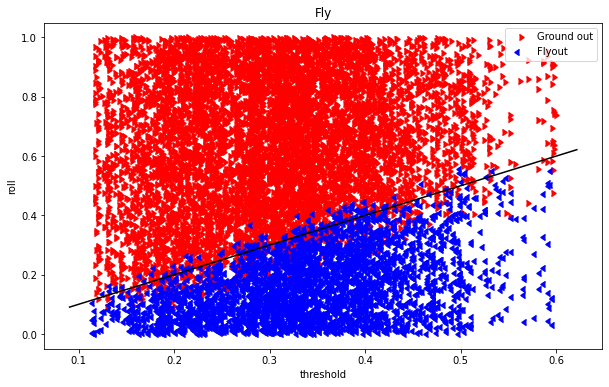

In [8]:
# dfc['threshold'] = 0.16-(
#      -0.2776083943255873 * dfc['batter_buoyancy_with_vibe']
#      -0.10076177945700408 * dfc['ballpark_elongation']
#      +0.07782492861928512 * dfc['ballpark_ominousness']
#      +0.05186526153248099 * dfc['ballpark_viscosity']
# )

dfc['threshold'] = -intercept_scaled[0]
print(-intercept_scaled)
for pair in zip(-np.array(coef_list), X.columns):
    if pair[1] != "roll":
        print(pair)
        dfc['threshold'] += pair[0] * dfc[pair[1]]

# x_val = "day"
x_val = "threshold"
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.scatter(dfc[~dfc['passed']][x_val], dfc[~dfc['passed']]["roll"], color="red",
           label="Ground out", marker=CARETRIGHTBASE)
ax.scatter(dfc[dfc['passed']][x_val], dfc[dfc['passed']]["roll"], color="blue",
           label="Flyout", marker=CARETLEFTBASE)
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
ax.set_title("Fly")
# ax.set_xlim(0.484, 0.499)

ax.plot(ax.get_xlim(), ax.get_xlim(), 'k')

ax.legend()

535


,offset,roll,threshold,event_type,fielder_roll,top_of_inning,inning,pitcher_multiplier,batter_multiplier,baserunner_count,...,batter_musclitude,batter_name,pitcher_name,batter_mods,pitcher_mods,batting_team_mods,pitching_team_mods,day,game_id,play_count
26990,0.085637,0.367553,0.281916,Flyout,0.395088,True,7,1.0,1.0,[],...,0.801767,Patel Beyonce,Oscar Vaughan,HONEY_ROASTED;REVERBERATING,ALTERNATE,PARTY_TIME,MIDDLING,96,9b671a70-c55f-4beb-bef2-5b1b8c5d4c01,277
20343,0.068115,0.399062,0.330947,Flyout,0.470069,False,4,1.0,1.0,['b60605e6-ff41-4388-a61a-fafd2175f7ad'],...,0.694862,Stijn Strongbody,Rivers Clembons,SWIM_BLADDER,ALTERNATE,POPCORN_PAYOUTS,LIFE_OF_PARTY;ELECTRIC,81,faecc678-2b00-4057-81f2-559225a6ff9f,191
23728,0.059441,0.405967,0.346526,Flyout,0.050722,False,3,1.0,1.0,"['c18961e9-ef3f-4954-bd6b-9fe01c615186', '542a...",...,0.834127,Quack Enjoyable,Leach Herman,NaN,ALTERNATE;FRIEND_OF_CROWS,PARTY_TIME,NaN,89,ea4a64d4-921f-4f5a-95e7-ffd805ee0c89,140
26502,0.054941,0.555239,0.500299,Flyout,0.898742,True,7,1.0,1.0,[],...,1.272179,Don Mitchell,Leach Herman,REVERBERATING,ALTERNATE;FRIEND_OF_CROWS,LOVE;PARTY_TIME,NaN,95,9ce3a14a-9cc0-410f-9793-7b671610d48c,237
22551,0.054565,0.417636,0.363071,Flyout,0.074167,True,7,1.0,1.0,[],...,0.797885,Cannonball Sports,Mags Banananana,NaN,WANDERER,LIFE_OF_PARTY;ELECTRIC,NaN,86,f876eca0-8935-4be5-9051-c70187054f5e,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32405,-0.135680,0.274836,0.410516,GroundOut,0.227960,True,0,1.0,1.0,[],...,0.877497,Huber Frumple,Mindy Kugel,NaN,TRIPLE_THREAT,AFFINITY_FOR_CROWS,MAINTENANCE_MODE;STALEPOPCORN_PAYOUTS,43,bc72f051-8b59-4347-ae44-56cd5d47c83e,12
18828,-0.138803,0.406572,0.545375,GroundOut,0.419818,False,0,1.0,1.0,['c6a19154-7438-4c4f-b786-2dfaf5951f0f'],...,1.033988,Alyssa Harrell,NaN,ALTERNATE,FLICKERING;ECHO;ALTERNATE,CARCINIZATION;UNHOLEY,LOVE,78,318c7c55-cf0b-4e69-9168-f388dacc3b18,36
29438,-0.151583,0.397665,0.549248,GroundOut,0.936608,True,2,1.0,1.0,[],...,1.130804,Alyssa Harrell,Vito Kravitz,ALTERNATE,ALTERNATE,CARCINIZATION;UNHOLEY,SUN_KISSED;SUN2_PAYOUTS,36,d3d2f904-4037-49ad-8597-2161ab532622,77
21352,-0.155095,0.290840,0.445935,GroundOut,0.389058,True,0,1.0,1.0,[],...,0.877497,Huber Frumple,Greer Lott,NaN,NaN,AFFINITY_FOR_CROWS,HIGH_PRESSURE,84,048bbb61-7a35-4a03-ab18-eecc731306a7,10


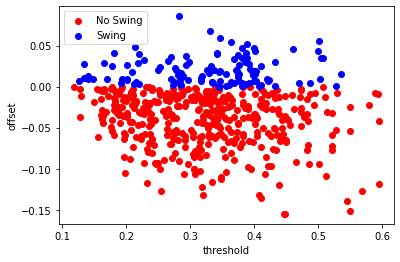

In [9]:
dfc["offset"] = dfc["roll"] - dfc["threshold"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))]

fig, ax = plt.subplots(1)
x_val = "threshold"
ax.scatter(outliers[~outliers['passed']][x_val], outliers[~outliers['passed']]["offset"], color="red", label="No Swing")
ax.scatter(outliers[outliers['passed']][x_val], outliers[outliers['passed']]["offset"], color="blue", label="Swing")
ax.set_xlabel(x_val)
ax.set_ylabel('offset')
ax.legend()

table = outliers
print(len(table))
table[["offset", "roll", "threshold", "event_type", "fielder_roll", "top_of_inning", "inning",
       "pitcher_multiplier", "batter_multiplier", "baserunner_count", "event_type",
       "batter_vibes", "pitcher_vibes",
       "pitcher_ruthlessness", "batter_musclitude",
       "batter_name", "pitcher_name", "batter_mods", "pitcher_mods",
       "batting_team_mods", "pitching_team_mods", "day",  "game_id", "play_count"]].sort_values('offset', ascending=False)
# len(table)